## Final Project Submission

Please fill out:
* Student name: Alexander Claudino Daffara
* Student pace: full time
* Scheduled project review date/time: Jan 27th 2023
* Instructor name: Brendan Hutchinson
* Blog post URL: https://medium.com/@alexanderdaffara


IDEAS

 - box office revenue compared to:
   - runtime
   - production budget
   - genre
   - male vs female lead role
   - movies released per region (looking at movie aka regions)
   - prominent role categories present (sound design, video etc.)
   - best directors and writers
   
 - rating compared to
   - box office

In [107]:
persons_df.loc[persons_df['primary_name'] == 'Meryl Streep']

,person_id,primary_name,birth_year,death_year,primary_profession
18533,nm0000658,Meryl Streep,1949.0,NaN,"actress,soundtrack,producer"


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

# Importing all the Data

## imdb

In [7]:
%%bash 
sqlite3 data/im.db
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [8]:
conn = sqlite3.connect('data/im.db')
cursor = conn.cursor()

In [103]:
movie_basics_df = pd.read_sql("""SELECT * FROM movie_basics """, conn)    # 146144  movie_id  (unique)
directors_df = pd.read_sql("""SELECT * FROM directors """, conn)          # 291174  movie_id  (140417 unique)
known_for_df = pd.read_sql("""SELECT * FROM known_for """, conn)          # 1638260 person_id 
movie_akas_df = pd.read_sql("""SELECT * FROM movie_akas """, conn)        # 331703  movie_id
movie_ratings_df = pd.read_sql("""SELECT * FROM movie_ratings """, conn)  # 73856   movie_id
persons_df = pd.read_sql("""SELECT * FROM persons """, conn)              # 606648  person_id
principals_df = pd.read_sql("""SELECT * FROM principals """, conn)        # 1028186 principals
writers_df = pd.read_sql("""SELECT * FROM writers """, conn)              # 255873  movie_id

In [96]:
movie_ratings_df = movie_ratings_df.merge(movie_basics_df, how='inner',on='movie_id')

In [100]:
movie_ratings_df = movie_ratings_df.loc[movie_ratings_df['numvotes'] > 1000]


In [102]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9611 entries, 3 to 73831
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         9611 non-null   object 
 1   averagerating    9611 non-null   float64
 2   numvotes         9611 non-null   int64  
 3   primary_title    9611 non-null   object 
 4   original_title   9611 non-null   object 
 5   start_year       9611 non-null   int64  
 6   runtime_minutes  9603 non-null   float64
 7   genres           9609 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 933.8+ KB


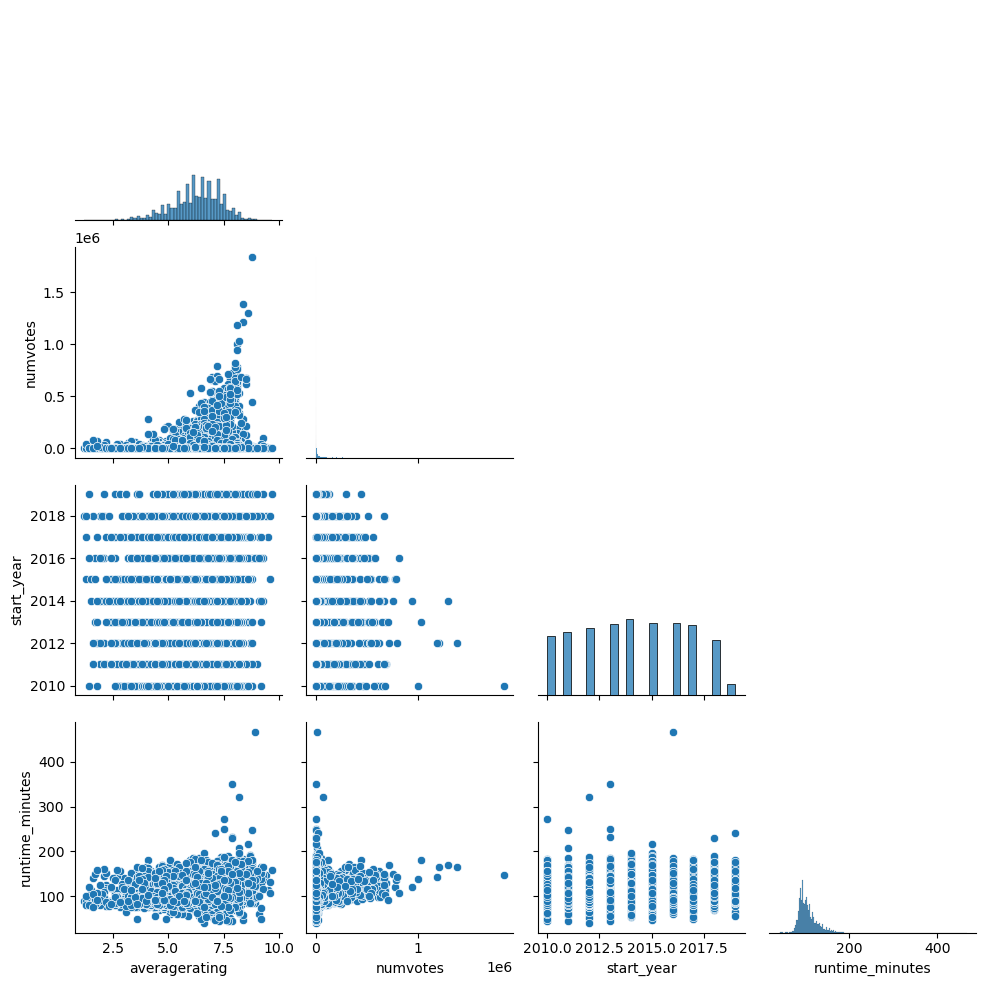

In [101]:
sns.pairplot(movie_ratings_df, corner=True)

In [10]:
# df_with_directors -> movie basics + directors (contains duplicates when a movie has multiple directors)
directors_df = directors_df.drop_duplicates()
df_with_directors = movie_basics_df.merge(directors_df, how="left", on='movie_id')
# merge with persons (losing info about person's occupations, birth and death year, due to too many nan)
df_with_directors = df_with_directors.merge(persons_df[['person_id','primary_name']], 
                                            on='person_id',
                                            how='left')
df_with_directors.rename(columns={'primary_name':'director_name','person_id':'director_id'}, inplace=True)
df_with_directors.drop(columns=['director_id'], inplace=True)
df_with_directors.drop_duplicates(inplace=True)
df_with_directors

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,director_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Harnam Singh Rawail
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Mani Kaul
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Orson Welles
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Hrishikesh Mukherjee
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Valeria Sarmiento
...,...,...,...,...,...,...,...
169257,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Ana Célia de Oliveira
169258,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Kanchan Nayak
169259,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,Kiran Gawade
169260,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Angela Gurgel


In [11]:
# df_with_writers -> movie basics + writers (contains duplicates when a movie has multiple writers)
writers_df = writers_df.drop_duplicates()
df_with_writers = movie_basics_df.merge(writers_df, how="left", on='movie_id')
# merge with persons (losing info about person's occupations, birth and death year, due to too many nan)
df_with_writers = df_with_writers.merge(persons_df[['person_id','primary_name']], 
                                            on='person_id',
                                            how='left')
df_with_writers.rename(columns={'primary_name':'writer_name','person_id':'writer_id'}, inplace=True)
df_with_writers.drop(columns=['writer_id'], inplace=True)
df_with_writers.drop_duplicates(inplace=True)
df_with_writers

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,writer_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Abrar Alvi
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Mahasweta Devi
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Gulzar
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Anjana Rawail
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN
...,...,...,...,...,...,...,...
214230,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Ana Célia de Oliveira
214231,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Dr. Sudhir Nikam
214232,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,Kiran Gawade
214233,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Vinicius Augusto Bozzo


## bom movie gross

In [39]:
# df_with_gross matches gross for all movies with the same name
# 'start_year' from movie_basics doesn't always match up with 'year' from gross_df
gross_df = pd.read_csv('data/bom.movie_gross.csv')
gross_df.dropna(subset=['foreign_gross','domestic_gross'], inplace=True)
gross_df['foreign_gross'] = gross_df['foreign_gross'].map(lambda x: float(x.replace(',',"")))
gross_df['total_gross'] = gross_df['foreign_gross'] + gross_df['domestic_gross']
# df_with_gross = movie_basics_df.merge(gross_df,
#                                       how='inner',
#                                       left_on='primary_title',
#                                       right_on='title')
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   float64
 4   year            2009 non-null   int64  
 5   total_gross     2009 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 109.9+ KB


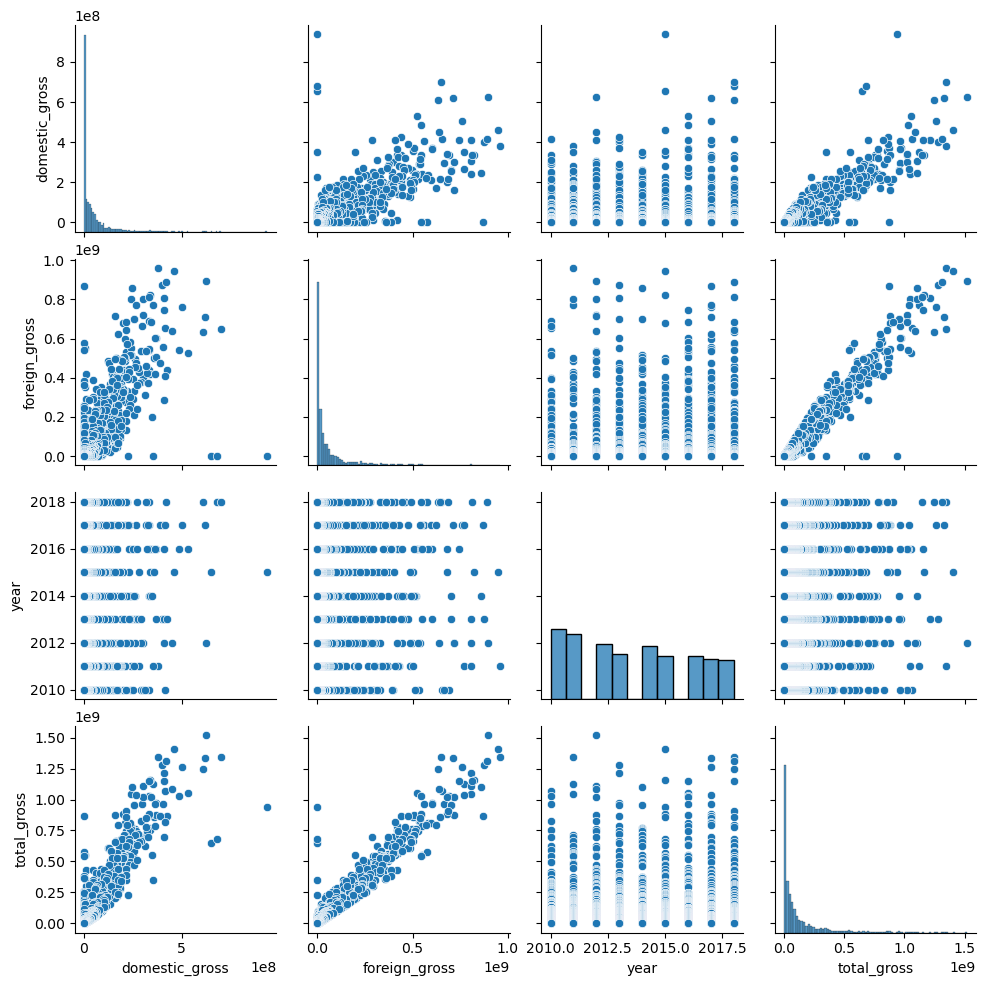

In [41]:
# ax = sns.histplot(x='year', y='domestic_gross', data=df_with_gross)
sns.pairplot(gross_df)

## TN movie budgets

In [89]:
budgets_df = pd.read_csv('data/tn.movie_budgets.csv')
df_with_budgets = movie_basics_df.merge(budgets_df,
                                     how='inner',
                                     left_on='primary_title',
                                     suffixes=['_imdb','_budgets'],
                                     right_on='movie').drop(columns=['id'])


In [90]:
budgets_df.drop(columns=['id'], inplace=True)
# convert prices from strings to numbers
budgets_df['production_budget'] = budgets_df['production_budget'].map(lambda x: float(x.replace('$','').replace(',','')))
budgets_df['domestic_gross'] = budgets_df['domestic_gross'].map(lambda x: float(x.replace('$','').replace(',','')))
budgets_df['worldwide_gross'] = budgets_df['worldwide_gross'].map(lambda x: float(x.replace('$','').replace(',','')))
budgets_df['release_date'] = budgets_df['release_date'].map(lambda x: int(x[-4:]))
budgets_df['revenue'] = budgets_df['worldwide_gross'] - budgets_df['production_budget']

# drop rows with no worldwide gross
budgets_df = budgets_df.loc[budgets_df['worldwide_gross'] != 0]


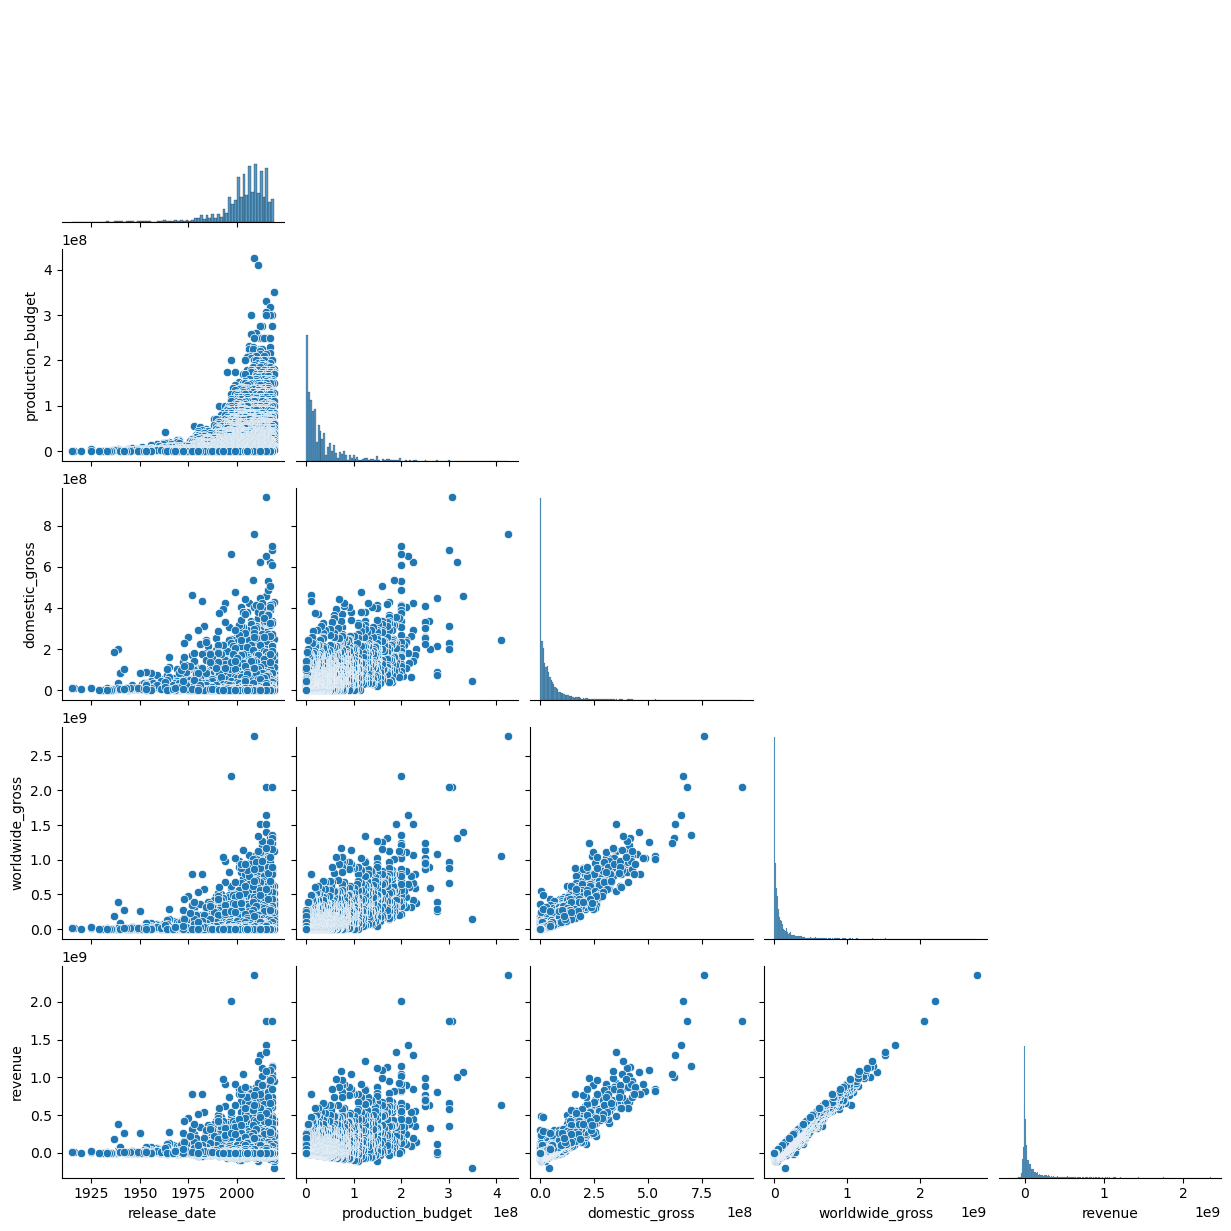

In [91]:
sns.pairplot(budgets_df, corner=True)

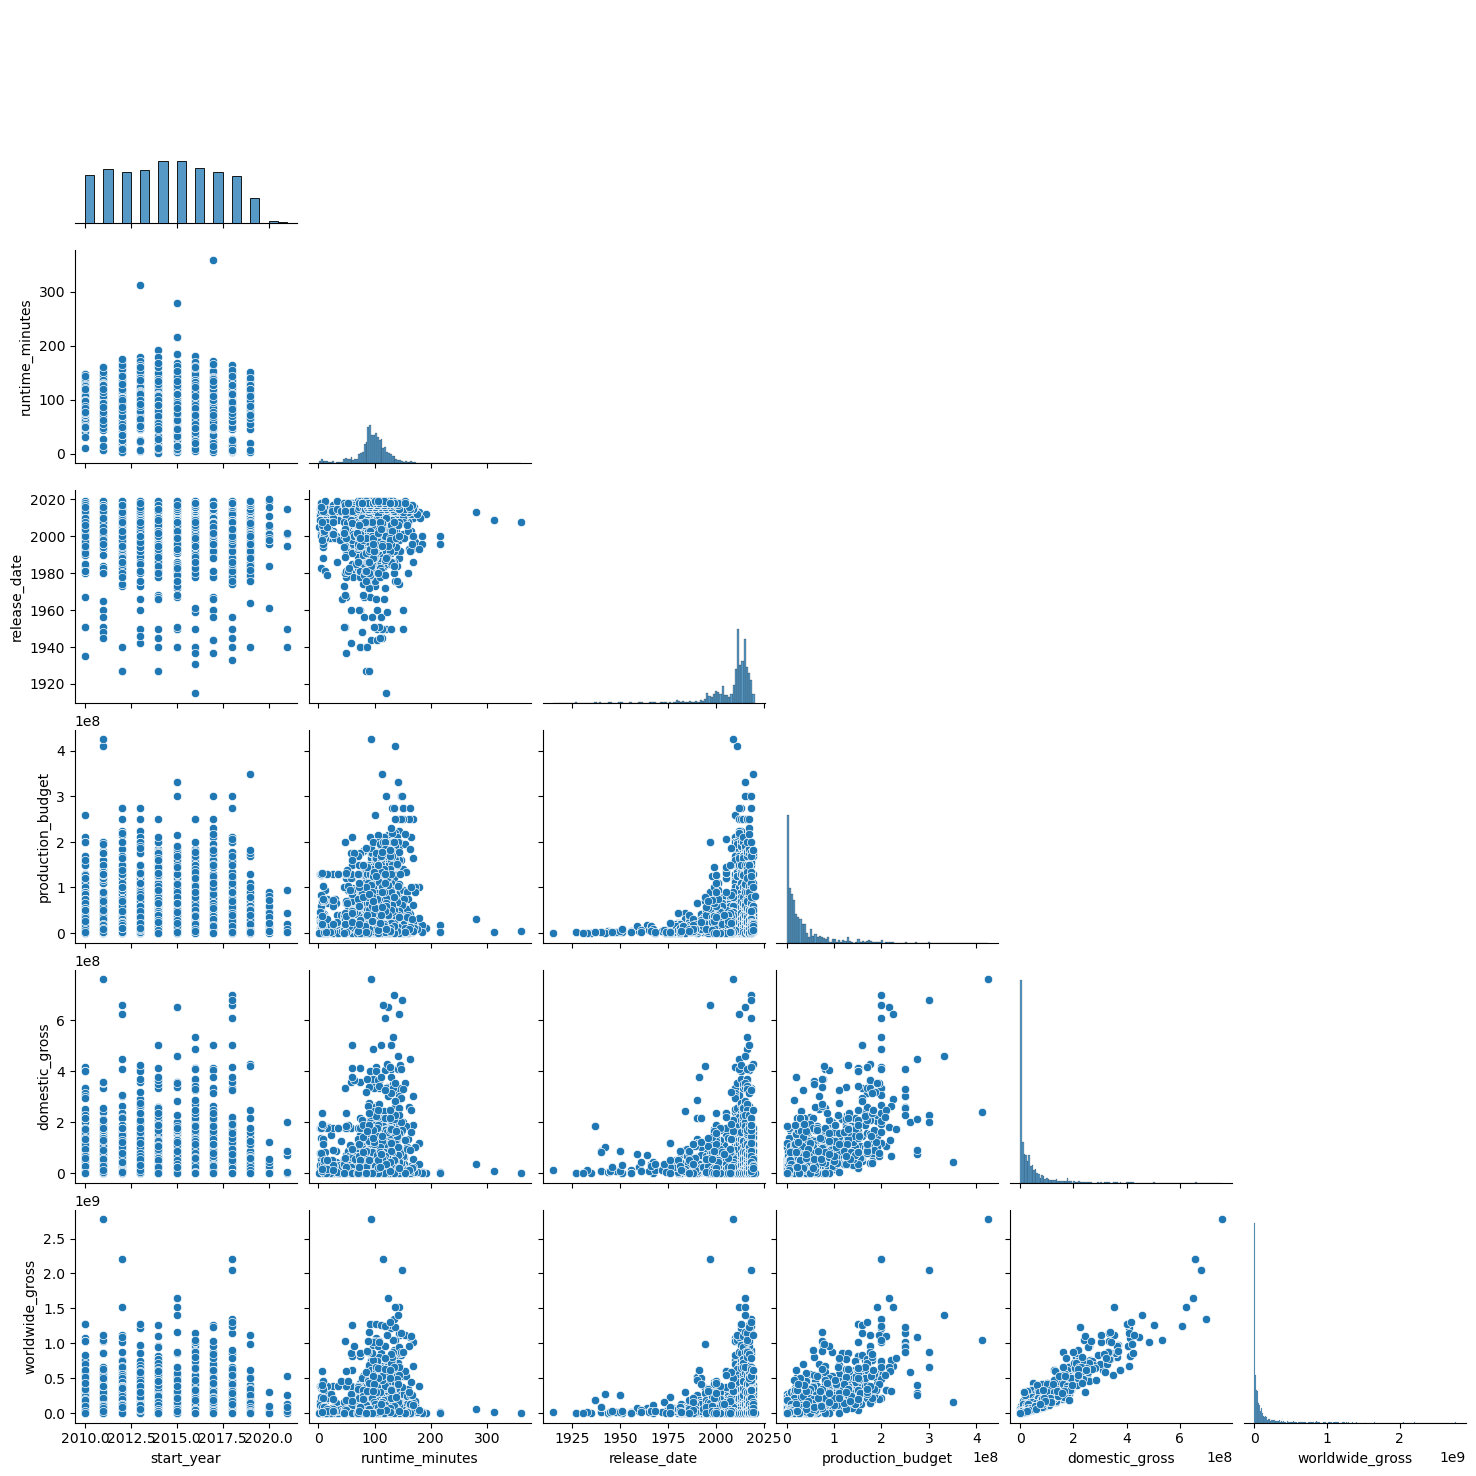

In [72]:
sns.pairplot(df_with_budgets, corner=True)

## rt movie info

In [33]:
rt_info_df = pd.read_csv('data/rt.movie_info.tsv', delimiter='\t')

In [34]:
rt_info_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


## rt reviews

In [370]:
rt_reviews_df = pd.read_csv('data/rt.reviews.tsv', delimiter='\t', encoding='latin-1')
rt_reviews_df

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


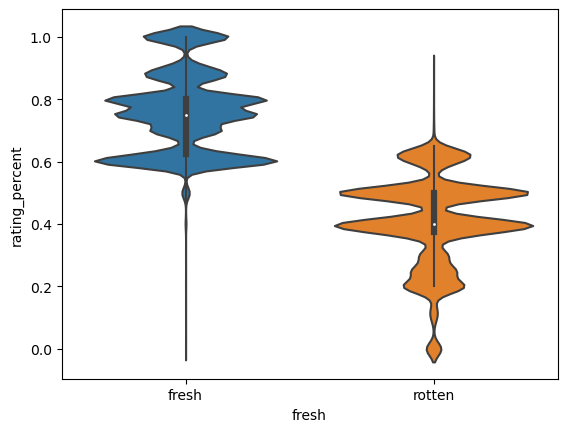

In [369]:
# ratings vs freshness
rt_reviews_df = pd.read_csv('data/rt.reviews.tsv', delimiter='\t', encoding='latin-1')
rt_reviews_df.dropna(subset=['rating'], inplace=True)

def rating_map(x):
    if x[0].isnumeric() and len(x.split()) == 1:
        if '/' in x: return eval(x)
    return np.nan

rt_reviews_df['rating_percent'] = rt_reviews_df.rating.map(rating_map)
rt_reviews_df.dropna(subset=['rating_percent'],inplace=True)
rt_reviews_df.drop(index = rt_reviews_df.loc[rt_reviews_df['rating_percent'] > 1].index, inplace=True)
ax = sns.violinplot(x='fresh',y='rating_percent', data=rt_reviews_df)